**CUSTOMER SEGMENTATION ANALYSIS**

In [1]:
##Used for Mathematical Computations
import numpy as np
#Used for data visualizations(plots & graphs)
import matplotlib.pyplot as plt 
#Used for Data Processing and Analysis
import pandas as pd
#used for data Statistical visualizations
import seaborn as sns

In [2]:
#check first 5 rows of the dataset
customer=pd.read_csv(r"C:\Python310\practice23\machine learning1\New folder\Mall_Customers.csv")
customer.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Getting information abot our datasets
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
#checking null values in the datasets
customer.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
#checking no.of.rows and columns in our datasets
customer.shape

(200, 5)

In [6]:
#factorize() is used to convert categorical data (non-numeric data) into numerical format.
customer['Gender']=pd.factorize(customer.Genre)[0]
customer

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,0


In [7]:
#checking columns in the dataframe
customer.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Gender'],
      dtype='object')

In [8]:
#dropping the columns which is not relevant for the problem
x=customer.drop(['CustomerID','Genre'],axis=1)


In [9]:
print(x)

     Age  Annual Income (k$)  Spending Score (1-100)  Gender
0     19                  15                      39       0
1     21                  15                      81       0
2     20                  16                       6       1
3     23                  16                      77       1
4     31                  17                      40       1
..   ...                 ...                     ...     ...
195   35                 120                      79       1
196   45                 126                      28       1
197   32                 126                      74       0
198   32                 137                      18       0
199   30                 137                      83       0

[200 rows x 4 columns]


In [10]:
#statistical description for each numeric columns in the dataframe
x.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.560000
std,13.969007,26.264721,25.823522,0.497633
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,1.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,137.000000,99.000000,1.000000


In [11]:
x.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender'], dtype='object')

In [12]:
numeric_value_X=x[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [13]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_value_X)
scaled_data

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [15]:
#Importing KNN model
from sklearn.cluster import KMeans
#For calculating the Silhouette score
from sklearn.metrics import silhouette_score

In [16]:
#number of clusters
n_clusters=[2,3,4,5,6,7,8,9]
#interia of clusters
clusters_inertia=[] 
#silhouette scores
silhouette_scores=[]
for n in n_clusters:
    kmeans = KMeans(n_clusters=n, init='k-means++').fit(numeric_value_X)
    clusters_inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(numeric_value_X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    


C:\Users\Varshini\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


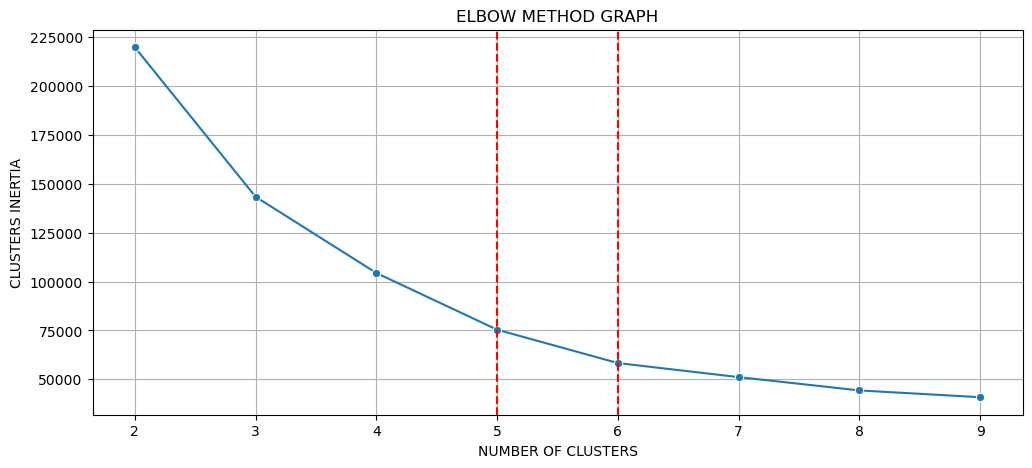

In [17]:
#graph shows the inertia for selected range of clusters(ELBOW METHOD)
fig,ax=plt.subplots(figsize=(12,5))
ax= sns.lineplot(n_clusters,clusters_inertia,marker='o',ax=ax)
ax.set_title('ELBOW METHOD GRAPH')
ax.set_xlabel('NUMBER OF CLUSTERS')
ax.set_ylabel('CLUSTERS INERTIA')
ax.axvline(5, ls='--',c='red')
ax.axvline(6, ls='--',c='red')
plt.grid()
plt.show()


In the above graph, the elbow method does not provide a clear bend point in the inertia plot, it has two clusters points such as 5 or 6 cluster. So,let see the another method called **Silhouette score**



C:\Users\Varshini\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


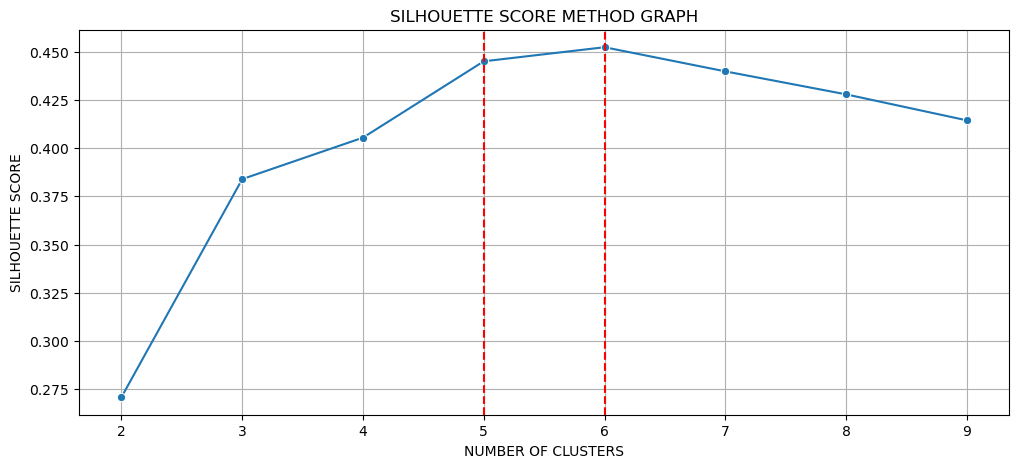

In [18]:
#graph shows the inertia for selected range of clusters(SILHOUETTE METHOD)
fig,ax=plt.subplots(figsize=(12,5))
ax= sns.lineplot(n_clusters,silhouette_scores,marker='o',ax=ax)
ax.set_title('SILHOUETTE SCORE METHOD GRAPH')
ax.set_xlabel('NUMBER OF CLUSTERS')
ax.set_ylabel('SILHOUETTE SCORE')
ax.axvline(5, ls='--',c='red')
ax.axvline(6, ls='--',c='red')
plt.grid()
plt.show()


In the above graph, the Silhouette method shows a two bend point in the inertia plot, which helps us choose the number of clusters as 5 or 6 cluster. so, now I'm using n_clusters=5 in Kmeans clustering algorithm



In [19]:
# Perform KMeans clustering with the chosen number of clusters
kmeans_cluster=KMeans(n_clusters=5,init='k-means++').fit(numeric_value_X)
kmeans_clusters=numeric_value_X.copy()
#append labels to points
kmeans_clusters.loc[:,'Cluster']= kmeans_cluster.labels_

C:\Users\Varshini\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


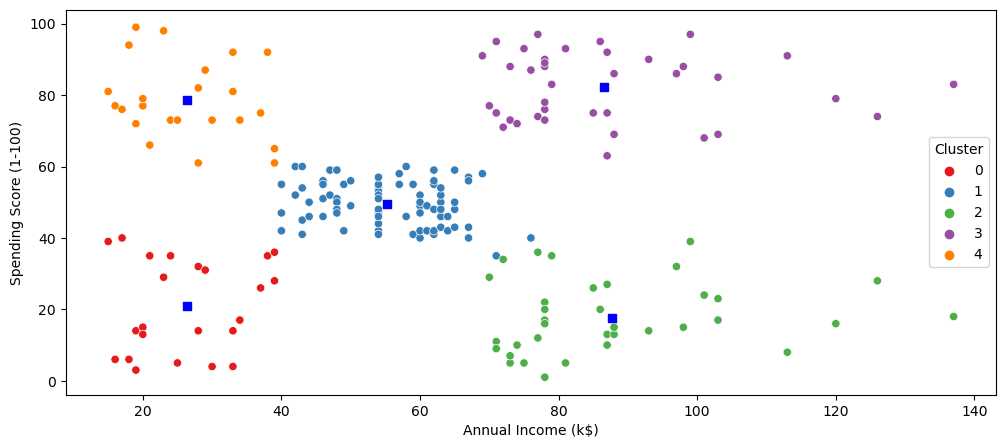

In [21]:
fig2,(axes)=plt.subplots(1,figsize=(12,5))

scatterplot_1=sns.scatterplot('Annual Income (k$)','Spending Score (1-100)',data=kmeans_clusters,hue='Cluster',ax=axes,
                              palette='Set1',legend='full')

axes.scatter(kmeans_cluster.cluster_centers_[:,1],kmeans_cluster.cluster_centers_[:,2],marker='s',s=40,c='blue')
plt.show()

K-Means algorithm generated the 5 clusters:

0--> Customer with **low** annual income and **high spending score**
 
1-->Customer with **medium** annual income and **medium spending score**
 
2--> Customer with **high** annual income and **low spending score**
 
3--> Customer with **high** annual income and **high spending score**
 
4--> Customer with **low** annual income and **low spending score**
 
 